# Introduction to Web Scraping and REST APIs

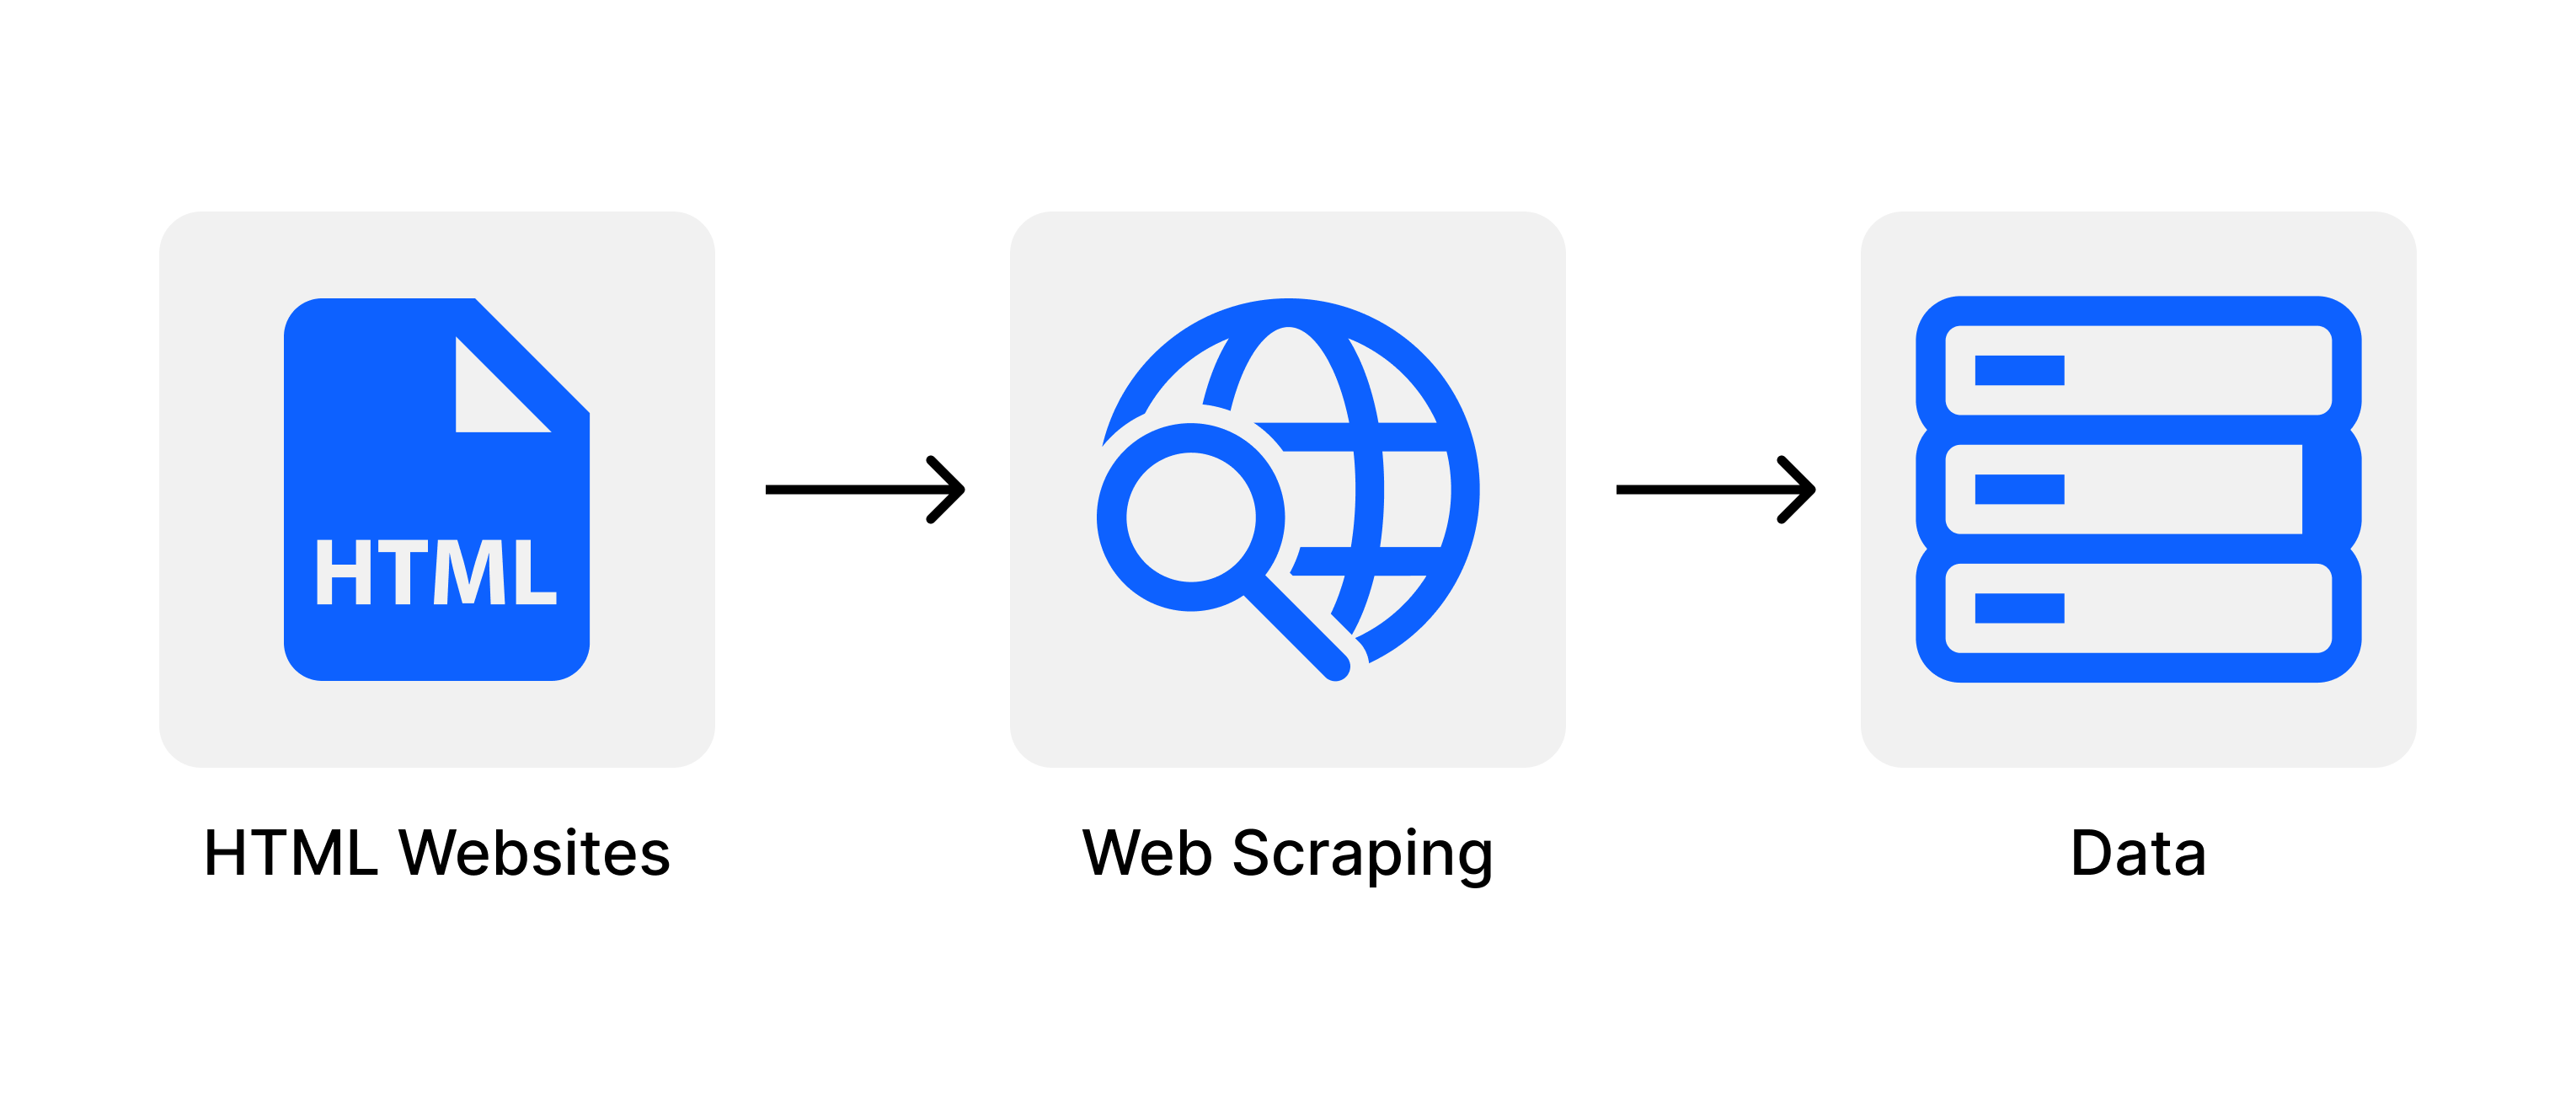

- Data is the important task for all the field , to find which is trending in the market.
- Any industry first they start collect the data and then only analysis.
- Here , we will see how to collect data from the web source using web scrapping
- Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer program. 
- It's a useful technique for creating datasets for research and learning.
- While web scraping often involves parsing and processing HTML documents, some platforms also offer REST APIs to retrieve information in a machine-readable format like JSON. 
- In this project, we are going to collect data from github.

# step by step Procedure:
- Downloading web pages using the requests library
- Inspecting the HTML source code of a web page
- Parsing parts of a website using Beautiful Soup
- Writing parsed information into CSV files
- Using a REST API to retrieve data as JSON
- Combining data from multiple sources
- Using links on a page to crawl a website

### First project  on web scraping is collecting data from github

#### Outline of the project

- We are going the scrap the topics from the 'https://github.com/topics'
- We get all the topics , in each topic we will get the topic title, topic description, topic link
- Each topic will get the 25 top repository.
- Each repository will get the title, description, star rating and link.
- Each topic will create a CSV file and store the top repository in that topic

#### Tools used
- request  for getting html page from url
- Beautifulsoup used to inspect and scrap the tag details
- os for creating directory and files
- pandas to convert the details into the dataframes used for our future analysis

#  scrap the topics 

#### Downloading web pages using the requests library

In [1]:
# Install the request library
!pip install requests --upgrade --quiet
# Install the wheel and pandas library
!pip install --upgrade  pip setuptools wheel --quiet
!pip install pandas  --quiet

!pip install beautifulsoup4 --upgrade --quiet


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
# import requests- to download get the html page
import requests
# import panada libray into our project 
import pandas as pd
# import os libriray for creating directories
import os
# import the beautifulsoup
from bs4 import BeautifulSoup

#### Going to scrap the Url "https://github.com/topics"

In [3]:
# create variable to dynamic programming this base_url is the primary url for github
base_url='https://github.com'
# list of topics in the topic_url
topic_url=base_url+'/topics'

# Extracting information from HTML using Beautiful Soup


- To extract information from the HTML source code of a webpage programmatically, we can use the Beautiful Soup library. Let's install the library and import the BeautifulSoup class from the bs4 module.

In [4]:
def get_topic_info(topic_url,path):
    response=requests.get(topic_url)
    #download the page
    response_topic_url= requests.get(topic_url)
    # check page is loaded or not
    if response.status_code != 200:
        raise Exception('Failed to load page  {}'.format(topic_url))
    # get Html contents
    page_content_topic=response_topic_url.text
    # write the Html content into file repository.html
    with open(path, 'w', encoding='utf-8') as file:
        file.write(page_content_topic)
    # Read the file repository.html
    with open(path, 'r') as f:
        html_source_topics=f.read()
    # get the tags for the username, repo_name, star_count, repo_url
    doc_rep=BeautifulSoup(html_source_topics, 'html.parser')
    return doc_rep
    

### Let create some helper function 

- for getting the 'p' in the Html file

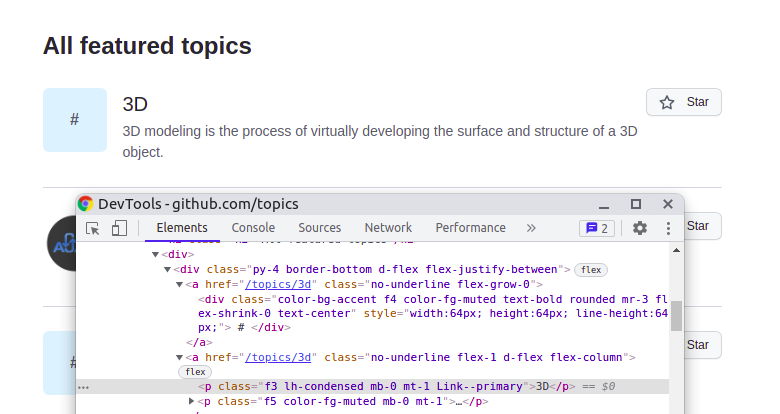


In [5]:
def get_topic_tag(doc_rep):
    # Selection_class_title which the common class attribute for all topic title in the DOM
    Selection_class_title='f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags=doc_rep.findAll('p', {'class': Selection_class_title})
    # Selection_class_desc which the common class attribute for all topic Description in the DOM
    Selection_class_desc='f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags=doc_rep.findAll('p',{'class':Selection_class_desc} )
    # Selection_class_URL which the common class attribute for all topic Links in the DOM
    Selection_class_URL='no-underline flex-1 d-flex flex-column'
    topic_link_tags=doc_rep.findAll('a',{'class':Selection_class_URL} )
    return topic_title_tags,topic_desc_tags,topic_link_tags



### Create CSV file for list of topics
- List contains the Topic Name, Topic description, Topic URl
- The URl will help to scrap the repository

In [6]:
def create_topic_dataset(topic_title_tags,topic_desc_tags,topic_link_tags, path):    
    # create a list for storing all the title, description, link collected from dom
    topic_title=[]
    topic_desc=[]
    topic_link=[]
    # iterating one by one and store the data
    for i in range(len(topic_title_tags)):
        topic_title.append(topic_title_tags[i].text.strip())
        topic_desc.append(topic_desc_tags[i].text.strip())
        topic_link.append(base_url +topic_link_tags[i]['href'])
    # create the dictory with the list created for creating dataframe and converting to csv
    topics_dict={
    'title': topic_title,
    'description' : topic_desc,
    'url' : topic_link,
    }   
    topic_df= pd.DataFrame(topics_dict)
    topic_df.to_csv(path,index=None)
    
    return topic_df
    

# Getting all repositories  out of  a topic page


- we are crawl into the topic URl
- we will gathering the information like username, repository url, star rating.

In [7]:
def get_repo_info_tags(topic_url, path):
    #download the page
    response_topic_url= requests.get(topic_url)
    # check page is loaded or not
    if response_topic_url.status_code != 200:
        raise Exception('Failed to load page  {}'.format(topic_url))
  
     # get Html contents
    page_content_topic=response_topic_url.text
    # write the Html content into file repository.html
    with open(path, 'w', encoding='utf-8') as file:
        file.write(page_content_topic)
    # Read the file repository.html
    with open(path, 'r') as f:
        html_source_repository=f.read()
    
    doc_rep=BeautifulSoup(html_source_repository, 'html.parser')
    
    return doc_rep



Converting the star count from string to int that is 64.7K to 64700

In [8]:
def parser_star_count(star_str):
    # convert the 64.7K to 64700
    star_str=star_str.strip()
    # checking that element is k
    if star_str[-1]== 'k':
        # Multiply the data with 1000 and convert to int 
        star_str=int(float(star_str[:-1])*1000)
    return star_str

Getting the h3 tag  and star_count

#### h3 tag

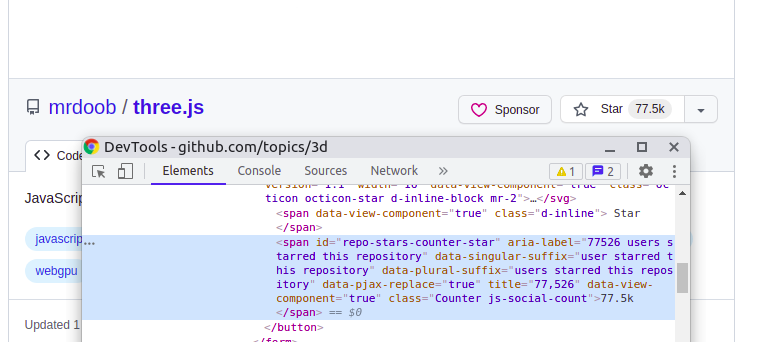

### Star count

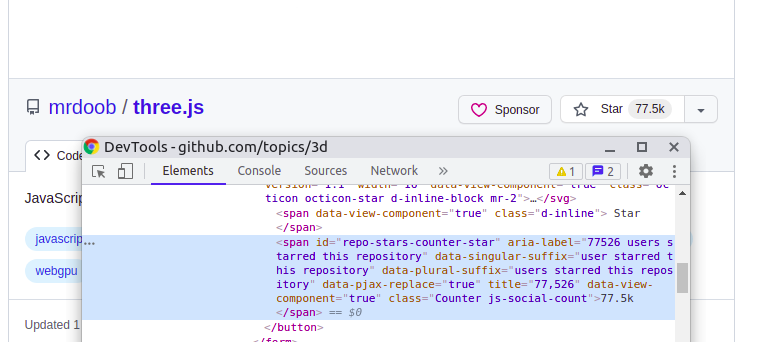



In [9]:
def get_repo_tag(doc_rep):
    # get the tags for the username, repo_name, star_count, repo_url
    h3_selection_class='f3 color-fg-muted text-normal lh-condensed'
    repo_tags=doc_rep.find_all('h3', {'class' :h3_selection_class})
    span_selection_class='Counter js-social-count'
    repo_star_tags=doc_rep.find_all('span', {'class' :span_selection_class})
    return repo_tags,repo_star_tags

Getting the child tag of the 'h1' tag

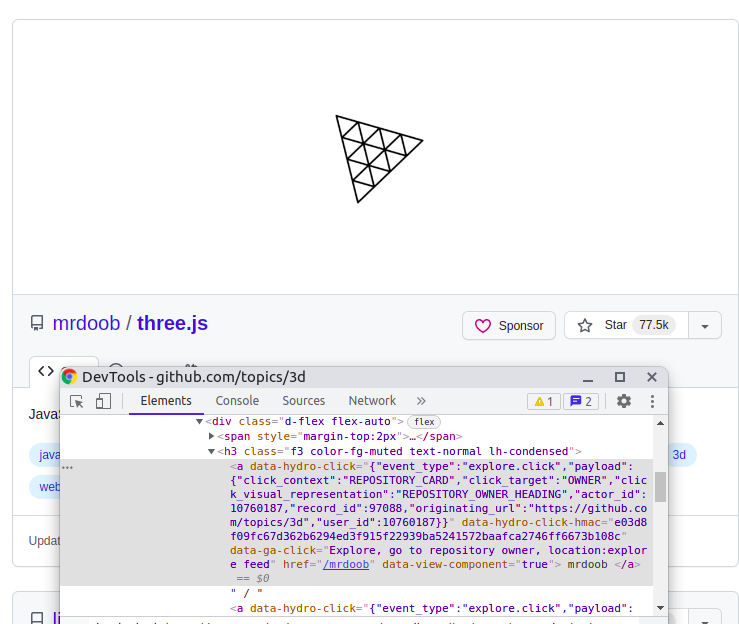
 

In [10]:
def get_repo_info(repo_tags,repo_star_tags):
    
    # Get the repo_user , name, url, star_count
    sub_tags=repo_tags.find_all('a')
    repo_user=sub_tags[0].text.strip()
    repo_url=base_url+sub_tags[1]['href']
    repo_name=sub_tags[1].text.strip()
    repo_star=parser_star_count(repo_star_tags.text)    
    return repo_user,repo_name,repo_star,repo_url 
    


Creating the function for storing the data in the dictionary and convert to dataframe
 Sample for the 3d topic

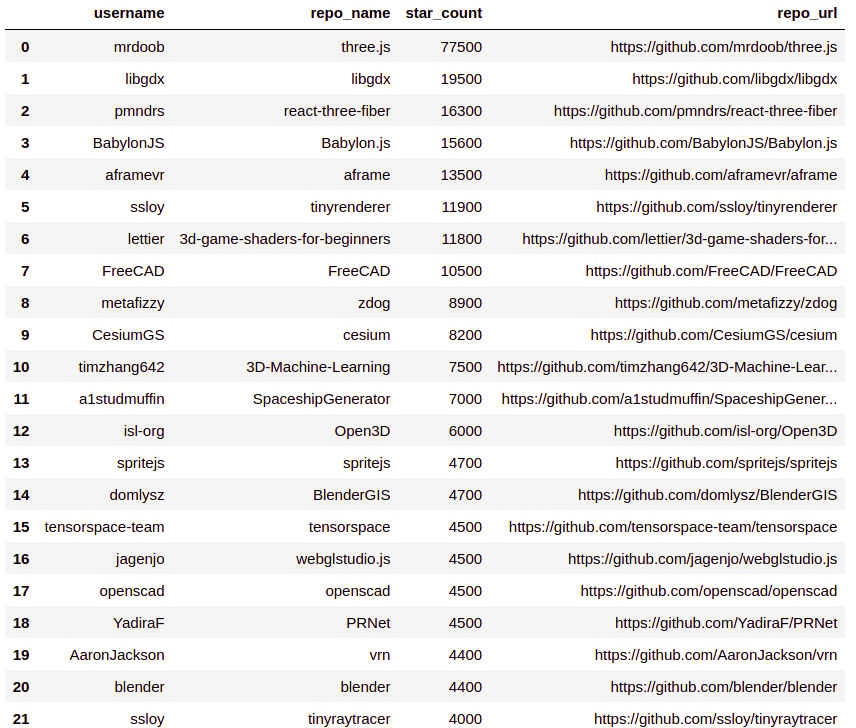

In [11]:
def create_repo_dataset(repo_tags,repo_star_tags,topic_repo_dict):
    
    # Update the dictionary and create dataframe
    for i in range(len(repo_tags)):
        repo_info =  get_repo_info(repo_tags[i], repo_star_tags[i])
        topic_repo_dict['username'].append(repo_info[0])
        topic_repo_dict['repo_name'].append(repo_info[1].strip())
        topic_repo_dict['star_count'].append(repo_info[2])
        topic_repo_dict['repo_url'].append(repo_info[3])
    return topic_repo_dict
    

Coverting the respository list of each topic into csv file and stored in the folder as below

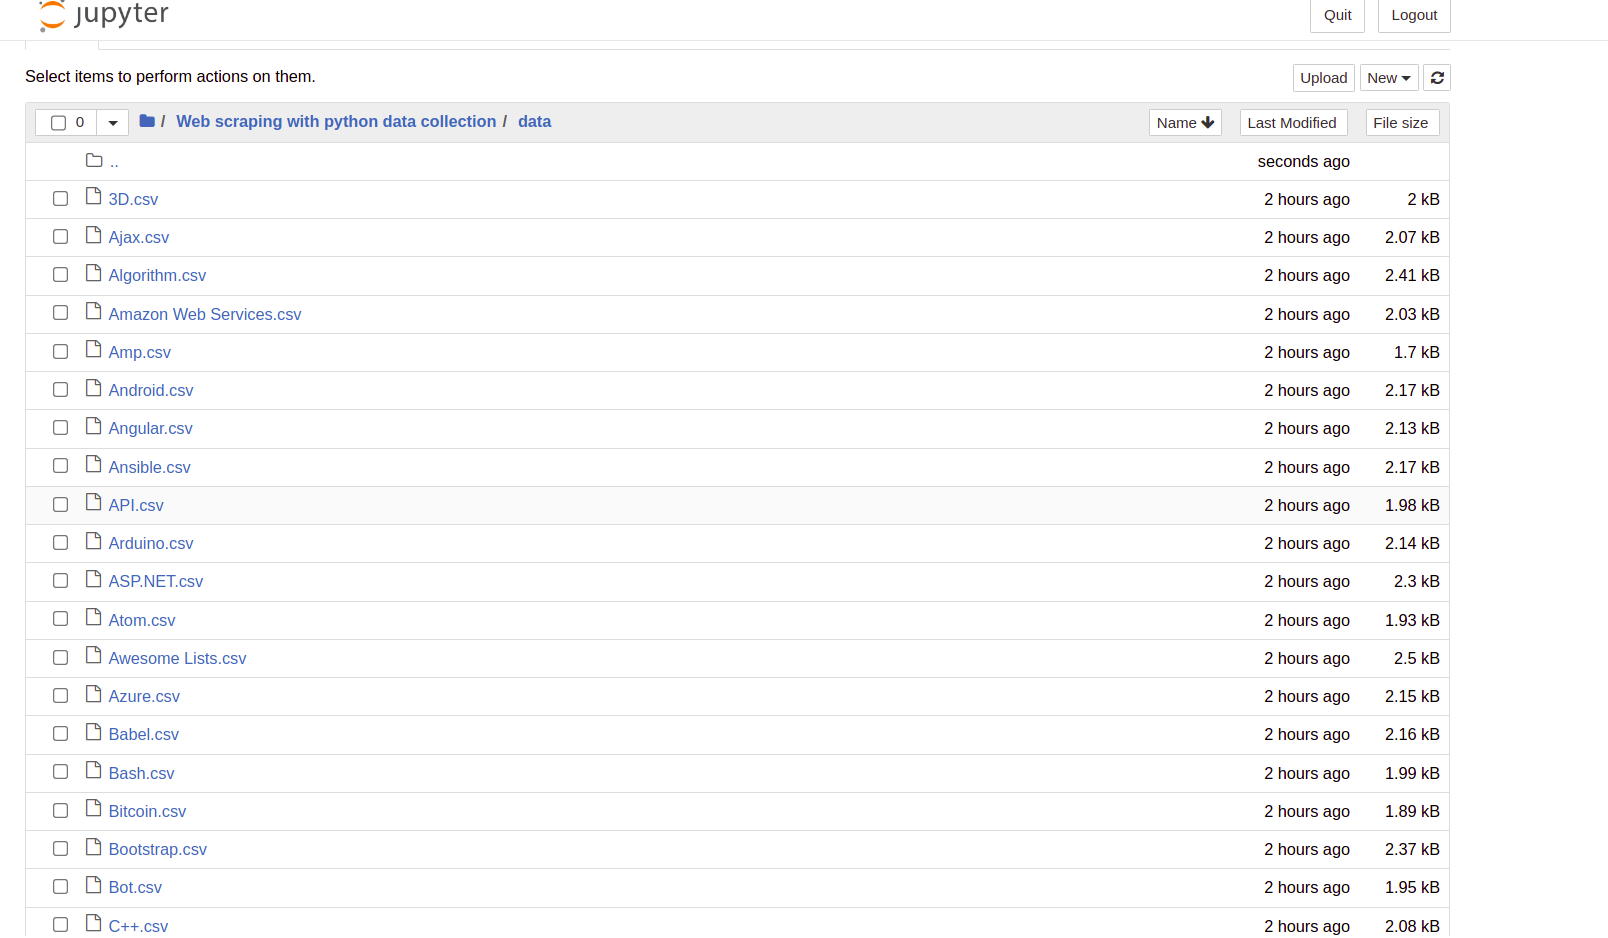

In [12]:

def scrap_topic(topic_name, path,topic_url,path1,topic_repo_dict):
    # checking the file alraedy created 
    if os.path.exists(path):
        print('The file name "{}" already exist so skipping'.format(format(path)))
        return
    # create Repository list in each topic and convert to csv
    repo_tags,repo_star_tags=get_repo_tag(get_repo_info_tags(topic_url,path1))
    topic_df=create_repo_dataset(repo_tags,repo_star_tags,topic_repo_dict)
    
    return topic_df

### Create the  topic list , folder and in the folder storage all the list of repository in all topics as seperate csv file



In [13]:
def scrap_repo(topic_url):
    # create topic list csv
    print('scrapping list of top topic from github')
    # create folder for repository list
    os.makedirs('data', exist_ok = True)
    # create folder for topic list
    os.makedirs('topics', exist_ok = True)
    # create folder for repository html
    os.makedirs('data_html', exist_ok = True)
    # create folder for topic html
    os.makedirs('topics_html', exist_ok = True)
    # scrapping the topics from each page
    for i in range(1,7):
        topic_title_tags,topic_desc_tags,topic_link_tags= get_topic_tag(get_topic_info(topic_url+'?page={}'.format(i), 'topics_html/topic_page{}.html'.format(i)))
        topics_list=create_topic_dataset(topic_title_tags,topic_desc_tags,topic_link_tags,'topics/topic_page{}.csv'.format(i)) 
        # create directories for storing the repository list in each topic csv
        # iterating to the topic data set for get each topic url and name
        for index, row in topics_list.iterrows():
            print('Scraping the top repositories for "{}" '. format(row['title'])) 
            # create dictionary
            topic_repo_dict={
                'username':[],
                'repo_name':[],
                'star_count':[],
                'repo_url':[]

            }
             # create folder for repository html
            data='data_html/{}'.format(row['title'])
            os.makedirs(data, exist_ok = True)
            for j in range(1,21):
                # create the repositories list csv file for each topic                
                topic_df=scrap_topic(row['title'],'data/{}.csv'.format(row['title']),row['url']+'?page={}'.format(j),'{}/{}_page{}.html'.format(data,row['title'],j),topic_repo_dict)
            pd.DataFrame(topic_df).to_csv('data/{}.csv'.format(row['title']),index=None)
    pass
        

In [16]:
scrap_repo(topic_url)

scrapping list of top topic from github
Scraping the top repositories for "3D" 
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
The file name "data/3D.csv" already exist so skipping
Th

Scraping the top repositories for "Arduino" 


Exception: Failed to load page  https://github.com/topics/arduino?page=3

#### output
 Run the file 
 
 Received output sample is

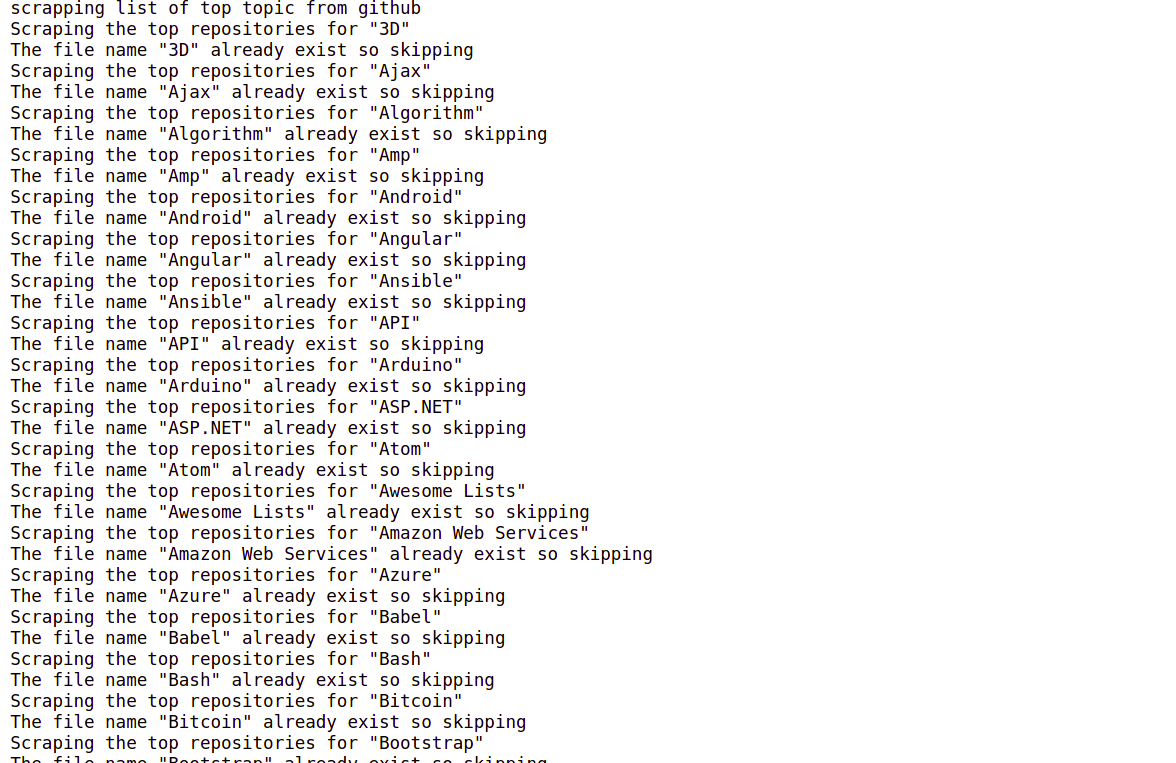

# Reference and Future work

## summary

- with the help of the web scrapping , we easily collect any type data from any type of the website
- web scraping make the data scientist data collection job easy
- Here , collecting lakhs of data from different page. some pages will not load properly. At that point exeception will split out.
- Then we need to run the 'scrap_repo(topic_url)' line again for many times.
- Here we are created folder structure as 
  ###    -
            -topic 'list of topics from different store its name, description, url'
            -topic_html ' list of Html pages for topic to be fetched'
            -data 'list of repository, will have different folder for each topic'
            -data_html' list of folder of different topic repository html page'
            

## Reference link

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://pandas.pydata.org/docs/
- https://docs.python-requests.org/en/latest/


### Idea for future work
- Data can be analyzed with numpy , pandas for deep learning and machine learning.
- Analysis which topic is trending
- what kind of repository will be liked by the users